# 1. Import dependencies

In [1]:
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
! pip install -q jmd_imagescraper
# these have the functionality to scrap images
from jmd_imagescraper.core import *
# to instantiate a concrete path
from pathlib import Path
#Using the image cleaner within the notebook to clean up the dataset and delete unsuitable images.
from jmd_imagescraper.imagecleaner import *

C:\Users\Hanh\anaconda3\envs\python 38\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


#  2. Collecting Data

In [ ]:
path = Path().cwd()/"snake_types"

In [ ]:
duckduckgo_search(path, "Plain bellied Water Snake","plain bellied water snake", 
                  max_results=2000)
duckduckgo_search(path, "Northern Cottonmouth","Northern Cottonmouth", 
                  max_results=2000)
duckduckgo_search(path, "Plain bellied Water Snake","plain bellied water snake Nerodia erythrogaster", 
                  max_results=2000)
duckduckgo_search(path, "Texas coral snake","Texas coral snake", 
                  max_results=2000)
duckduckgo_search(path, "Louisiana Milk Snake","Louisiana Milk Snake", 
                  max_results=2000)

In [5]:
snake_types = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)

## 2.1 Building data block

Data block API is a high-level API in fastai that is an expressive API for data loading. ... Think of the Data Block as a list of instructions to do when you're building batches

In [12]:
snake_types = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)

fast Ai dataloaer is an API compatible with PyTorch DataLoader, with a lot more callbacks and flexibility

In [13]:
dls = snake_types.dataloaders('./preprocessed-cleaned-set/train')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


# 3.Train model with ResNets-18

ResNets are a common neural network architecture used for deep learning computer vision applications like object detection and image segmentation. ResNet can contain a large number of convolutional layers, commonly between 18-152, but supporting up to thousands of layers

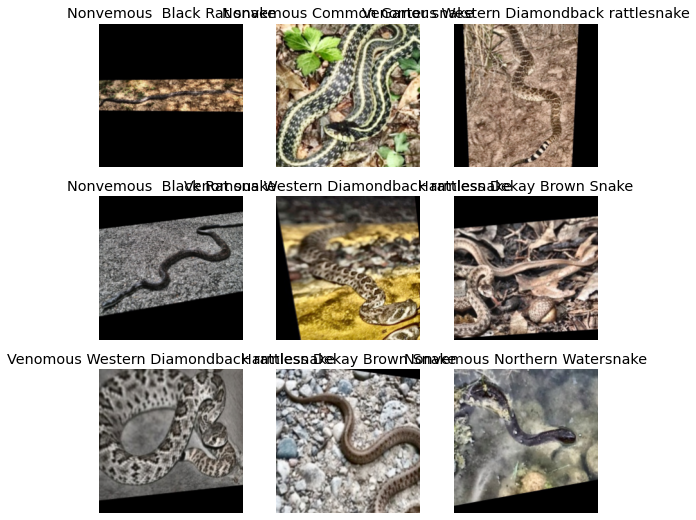

In [14]:

dls.show_batch(nrows=3, ncols=3)

In [16]:
from fastai.callback.fp16 import *

In [17]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy]).to_fp16()
learn.fine_tune(12)

C:\Users\Hanh\anaconda3\envs\python 38\lib\site-packages\torch\cuda\amp\autocast_mode.py:120: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")
C:\Users\Hanh\anaconda3\envs\python 38\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.663030,0.880553,0.708887,11:11


epoch,train_loss,valid_loss,accuracy,time
0,1.017958,0.693168,0.764556,13:00
1,0.793955,0.605680,0.782431,12:25
2,0.669851,0.583197,0.803882,13:36
3,0.549573,0.496896,0.840143,12:54
4,0.459102,0.458110,0.850358,12:55
5,0.375106,0.492058,0.837589,12:54
6,0.304814,0.444283,0.856486,13:05
7,0.238605,0.427952,0.862104,13:12
8,0.183532,0.456347,0.856486,13:09
9,0.157228,0.412133,0.873340,11:53


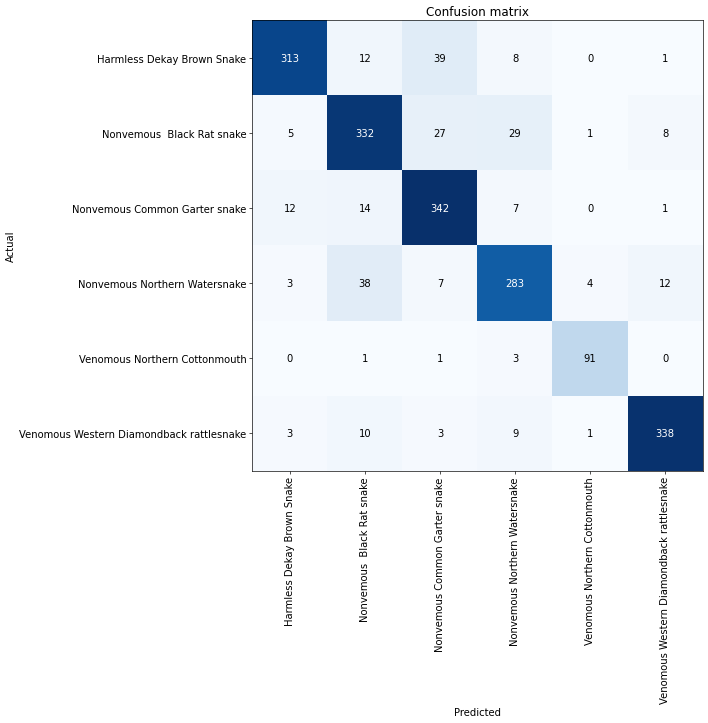

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
learn.path = Path('./pkl_data')
learn.export("snake.pkl")